Analisis de datos

In [1]:
from categorias import get_categorias
from medios import get_capturas_df, get_medios_path


df = get_capturas_df()
categorias = get_categorias(df)


In [2]:
df

,id,url,Timestamp,DescripcionEnEstudio,Medico_ID,TipoEstudio,Age,Sexo,file_exists_status
0,6153,Estudios/196/20201222/IMG_20201222_080548_0c71...,2020-12-22 08:05:48.483,LARINGE,3,1,56,M,False
1,6160,Estudios/196/20201222/IMG_20201222_080651_e066...,2020-12-22 08:06:51.740,DUODENO,3,1,56,M,False
2,6794,Estudios/209/20201226/IMG_20201226_094710_a2ac...,2020-12-26 09:47:10.640,RETRO-HERNIA,1,1,65,M,False
3,7255,Estudios/221/20201229/IMG_20201229_083337_9fcd...,2020-12-29 08:33:37.810,ESTOMAGO,3,1,56,F,False
4,7289,Estudios/221/20201229/IMG_20201229_090448_5932...,2020-12-29 09:04:48.220,ANGULO,3,4,56,F,False
...,...,...,...,...,...,...,...,...,...
36209,184594,Estudios/5456/20220806/IMG_20220806_110542_7c6...,2022-08-06 11:05:42.940,CUERPO-POLIPO NBI,1,1,68,F,False
36210,179600,Estudios/5339/20220723/IMG_20220723_080621_61e...,2022-07-23 08:06:21.550,ESOFAGO,3,1,33,F,False
36211,179614,Estudios/5339/20220723/IMG_20220723_080738_258...,2022-07-23 08:07:38.787,RETRO-FONDO,3,1,33,F,False
36212,179649,Estudios/5341/20220723/IMG_20220723_084338_1a4...,2022-07-23 08:43:38.827,ESOFAGO,3,1,30,M,False


In [3]:
categorias

,Categoria,Nombre
0,1,LARINGE
1,2,DUODENO
2,3,RETRO-HERNIA
3,4,ESTOMAGO
4,5,ANGULO
...,...,...
2816,2817,RETRO POLIPO NBI
2817,2818,ESOFAGO PROXIMAL.
2818,2819,ANTRO-PILORO.
2819,2820,RETRO CUERPO ALIMENTO


Librerias de tensorflow

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

2023-01-26 22:13:50.667364: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-26 22:13:50.870628: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-01-26 22:13:50.928233: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-01-26 22:13:50.928260: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not ha

In [5]:
medios_path = get_medios_path()
print(medios_path)

import pathlib
data_dir = pathlib.Path(medios_path)

image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

/home/elpacko/Gastroclub/EstudiosSeparados/
8849


LARINGE
/home/elpacko/Gastroclub/EstudiosSeparados/1/IMG_20210728_080846_c9cf9a2a-5e5d-4b10-a702-081e70113994.jpg


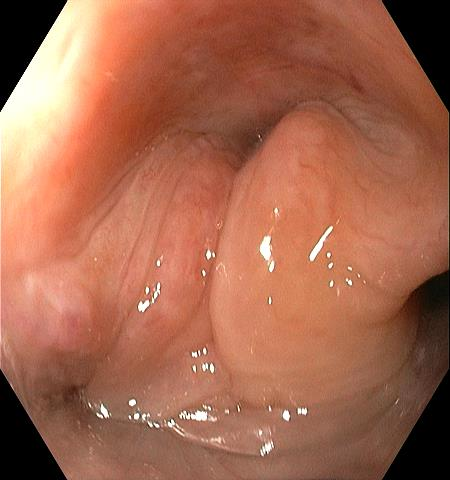

In [6]:
categoria = categorias.iloc[0]
print(categoria["Nombre"])
import random
imagen = list(data_dir.glob(f'{categoria["Categoria"]}/*'))
imagen_int = random.randint(0, len(imagen))

print (imagen[imagen_int])
PIL.Image.open(str(imagen[imagen_int]))


RETRO-HERNIA
/home/elpacko/Gastroclub/EstudiosSeparados/3/IMG_20220407_080916_fc5b8f93-13aa-45d5-92bb-176f47c20f02.Png


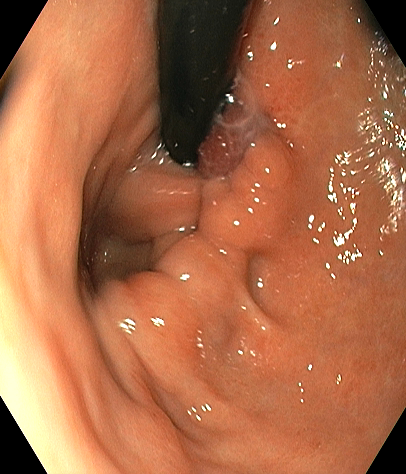

In [7]:
categoria = categorias.iloc[2]
print(categoria["Nombre"])
import random
imagen = list(data_dir.glob(f'{categoria["Categoria"]}/*'))
imagen_int = random.randint(0, len(imagen))

print (imagen[imagen_int])
PIL.Image.open(str(imagen[imagen_int]))

In [8]:
batch_size = 2
img_height = 450
img_width = 450

#TODO: pre-proceso de distintos tamanios

In [9]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 19854 files belonging to 1383 classes.
Using 15884 files for training.


2023-01-26 22:13:53.240729: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-01-26 22:13:53.240936: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2023-01-26 22:13:53.240960: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (GigaMan): /proc/driver/nvidia/version does not exist
2023-01-26 22:13:53.243218: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [10]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 19854 files belonging to 1383 classes.
Using 3970 files for validation.


In [11]:
class_names = train_ds.class_names
print(class_names[:10])

['1', '10', '1000', '1001', '1002', '1003', '1004', '1005', '1006', '1008']


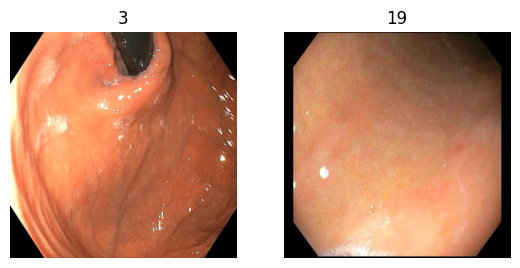

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(2):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [14]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(2, 450, 450, 3)
(2,)


In [15]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [16]:
normalization_layer = layers.Rescaling(1./255)


In [17]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 1.0


2023-01-26 22:14:55.896435: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


In [18]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [19]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [20]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 450, 450, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 450, 450, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 225, 225, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 225, 225, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 112, 112, 32)     0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 64)      1

In [21]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
 493/7942 [>.............................] - ETA: 10:01 - loss: 5.2803 - accuracy: 0.0517

KeyboardInterrupt: 

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()